In [8]:
import pandas as pd

In [30]:
ep0 = pd.read_csv('./outputs/anli/epoch_0_predictions.csv')
ep1 = pd.read_csv('./outputs/anli/epoch_1_predictions.csv')
ep2 = pd.read_csv('./outputs/anli/epoch_2_predictions.csv')
ep3 = pd.read_csv('./outputs/anli/epoch_3_predictions.csv')
ep4 = pd.read_csv('./outputs/anli/epoch_4_predictions.csv')

# ep0 = pd.read_csv('./outputs/mcq/epoch_0_predictions.csv')
# ep1 = pd.read_csv('./outputs/mcq/epoch_1_predictions.csv')
# ep2 = pd.read_csv('./outputs/mcq/epoch_2_predictions.csv')
# ep3 = pd.read_csv('./outputs/mcq/epoch_3_predictions.csv')
# ep4 = pd.read_csv('./outputs/mcq/epoch_4_predictions.csv')

In [31]:
# df = pd.read_csv("./anli/train.csv")
# df1 = df.sample(7000, random_state=123)
# # df2 = df.sample(1000, random_state=42)
# df1[:5000].to_csv("./anli/train_5k1.csv")
# df1[5000:].to_csv("./anli/dev.csv")

In [32]:
import numpy as np
difficulty = []
confidence = []
for i in range((ep4.shape[0])):
#     if ep0.iloc[i]['label'] >3:
#         print(ep0.iloc[i]['label']+2)
    val1 = ep0.iloc[i][int(ep0.iloc[i]['label'])+2]
    val2 = ep1.iloc[i][int(ep1.iloc[i]['label'])+2]
    val3 = ep2.iloc[i][int(ep2.iloc[i]['label'])+2]
    val4 = ep3.iloc[i][int(ep3.iloc[i]['label'])+2]
    val5 = ep4.iloc[i][int(ep4.iloc[i]['label'])+2]
    
    confidence.append((val1+val2+val3+val4+val5)/5)
    difficulty.append(np.std([val1,val2,val3,val4,val5]))
#     confidence.append((val1+val2+val3)/3)
#     difficulty.append(np.std([val1,val2,val3]))
    

<AxesSubplot:>

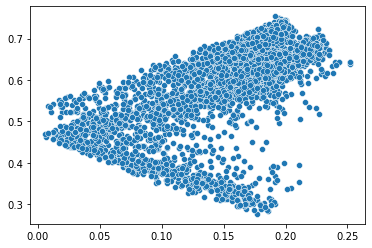

In [33]:
import seaborn as sns
sns.scatterplot(x= difficulty, y = confidence)

In [34]:
confidence_sorted_indices = sorted(range(len(confidence)),key=confidence.__getitem__)[::-1]

In [35]:
confidence[confidence_sorted_indices[4000]]

0.5293453335762024

In [36]:
train_df = pd.read_csv('./anli/train_5k1.csv')

In [37]:
selected_data_easy = train_df.iloc[confidence_sorted_indices[:1000]]
selected_data_ambi = train_df.iloc[confidence_sorted_indices[1000:4000]]
selected_data_hard = train_df.iloc[confidence_sorted_indices[4000:]]

In [38]:
selected_data_easy.to_csv('./anli/selected_data_easy.csv')
selected_data_ambi.to_csv('./anli/selected_data_ambi.csv')
selected_data_hard.to_csv('./anli/selected_data_hard.csv')

In [39]:
# selected_data_easy.to_csv('./mcq/selected_data_easy.csv')
# selected_data_ambi.to_csv('./mcq/selected_data_ambi.csv')
# selected_data_hard.to_csv('./mcq/selected_data_hard.csv')

In [40]:
train_easy_50_hard_100 = pd.concat([selected_data_easy.sample(frac=0.5), selected_data_hard])
train_easy_50_hard_100.to_csv('./anli/train_easy_50_hard_100.csv')

In [41]:
train_easy_75_hard_100 = pd.concat([selected_data_easy.sample(frac=0.75), selected_data_hard])
train_easy_75_hard_100.to_csv('./anli/train_easy_75_hard_100.csv')

In [42]:
train_easy_100_hard_100 = pd.concat([selected_data_easy, selected_data_hard])
train_easy_100_hard_100.to_csv('./anli/train_easy_100_hard_100.csv')

In [43]:
train_easy_50_ambi_50_hard_100 = pd.concat([selected_data_easy.sample(frac=0.5), selected_data_ambi.sample(frac=0.5),selected_data_hard])
train_easy_50_ambi_50_hard_100.to_csv('./anli/train_easy_50_ambi_50_hard_100.csv')

In [44]:
train_easy_50_ambi_50 = pd.concat([selected_data_easy.sample(frac=0.5), selected_data_ambi.sample(frac=0.5)])
train_easy_50_ambi_50.to_csv('./anli/train_easy_50_ambi_50.csv')

# need to train later
train_easy_75_ambi_100 = pd.concat([selected_data_easy.sample(frac=0.75), selected_data_ambi])
train_easy_75_ambi_100.to_csv('./anli/train_easy_75_ambi_100.csv')
train_easy_100_ambi_100 = pd.concat([selected_data_easy, selected_data_ambi])
train_easy_100_ambi_100.to_csv('./anli/train_easy_100_ambi_100.csv')

In [45]:
train_ambi_50_hard_50 = pd.concat([selected_data_ambi.sample(frac=0.75), selected_data_hard.sample(frac=0.5)])
train_ambi_50_hard_50.to_csv('./anli/train_ambi_50_hard_50.csv')
train_ambi_75_hard_100 = pd.concat([selected_data_ambi.sample(frac=0.75), selected_data_hard])
train_ambi_75_hard_100.to_csv('./anli/train_ambi_75_hard_100.csv')
train_ambi_100_hard_100 = pd.concat([selected_data_ambi, selected_data_hard])
train_ambi_100_hard_100.to_csv('./anli/train_ambi_100_hard_100.csv')

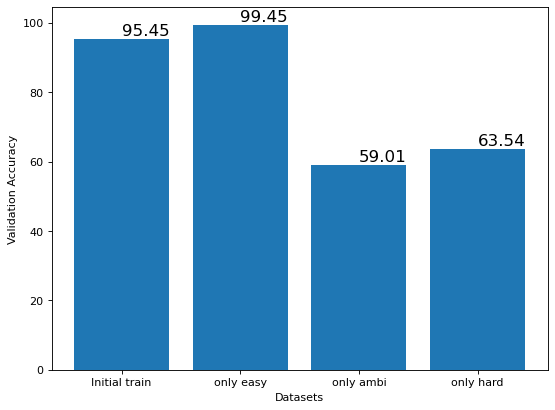

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

x = ('Initial train', 'only easy', 'only ambi', 'only hard')
y = (82.91, 100.00, 98.46, 63.54)

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Datasets')
plt.ylabel('Training Accuracy')
# for i in range(len(y)):
#     plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
#     #plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.show()

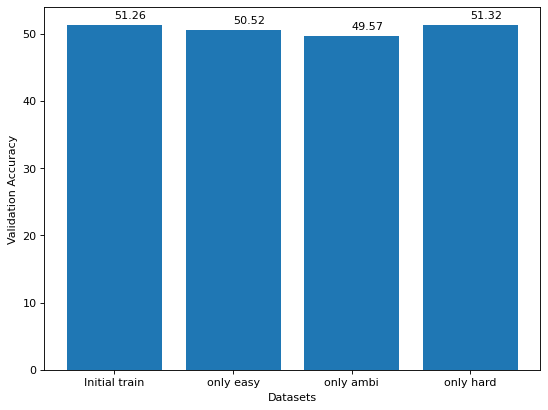

In [79]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

x = ('train', 'easy', 'ambi', 'hard', 'ambi50hard50','ambi75hard100')
y = (51.26, 50.52, 49.57, 51.32)

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Datasets')
plt.ylabel('Validation Accuracy')
# for i in range(len(y)):
#     plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
#     #plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
for index,data in enumerate(y):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.show()